
**Iport Libraries**

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib.cbook import boxplot_stats
import seaborn as sns
import math
from sklearn.linear_model import LogisticRegression
from scipy.stats import entropy as en
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from math import log2
from sklearn.model_selection import train_test_split
!pip install joblib
import json
import subprocess
import sqlalchemy
!pip install mlxtend
import joblib
import sys
from sklearn import preprocessing
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs



from sklearn.preprocessing import normalize
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
from collections import Counter

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Xcel to csv


In [ ]:
CollectedData_Xcel= pd.read_excel('CollectedData.xlsx')
 
#print(CollectedData_Xcel.head())
CollectedData_Xcel.to_csv ("CollectedData.csv", index = None, header=True)
CollectedData_csv = pd.read_csv("CollectedData.csv")
#print(CollectedData_csv.head())
CollectedData_csv=CollectedData_csv.rename(columns={CollectedData_csv.columns[2]:'Age',CollectedData_csv.columns[7]:'AMV',CollectedData_csv.columns[21]:'Clo',CollectedData_csv.columns[18]:'Met',CollectedData_csv.columns[25]:'Dewpt',CollectedData_csv.columns[26]:'PlaneRadTemp',CollectedData_csv.columns[36]:'Ta',CollectedData_csv.columns[37]:'Tmrt',CollectedData_csv.columns[39]:'Vel',CollectedData_csv.columns[41]:'AirTurb',CollectedData_csv.columns[42]:'Pa',CollectedData_csv.columns[43]:'Rh',CollectedData_csv.columns[73]:'TaOutdoor',CollectedData_csv.columns[76]:'RhOutdoor',CollectedData_csv.columns[48]:'PMV'})
#CollectedData_csv.info()


***Part A. Preprocessing***

In [ ]:
Selecting_the_data = pd.DataFrame(CollectedData_csv, columns=['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV'])
print(Selecting_the_data)
DataType = Selecting_the_data.dtypes
print('-------Data type of each column of Dataframe :------')
print(DataType)
print('---------NUMBER OF NULLS IN EACH COlumn---------')
print(CollectedData_csv[['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV']].isna().sum())


print('---------Find min---------')

print(CollectedData_csv[['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV']].min())
print('---------Find max---------')
print(CollectedData_csv[['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV']].max())
print('---------Find varience---------')
print(CollectedData_csv[['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV']].var())

print('---------Find STD---------')

print(CollectedData_csv[['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV']].std())
print("\n----------- Calculate Mean -----------\n")
print(Selecting_the_data.mean())
 
print("\n----------- Calculate Median -----------\n")
print(Selecting_the_data.median())
 
print("\n----------- Calculate Mode -----------\n")
print(Selecting_the_data.mode())

print("\n----------- Calculate Outliers -----------\n")
for i in range(0,15):
  Outliers=Selecting_the_data[Selecting_the_data.columns[i]].dropna()
  stats=boxplot_stats(Outliers)
  print(len(set(stats[0]['fliers'])))

          Age   Clo  Met   Dewpt  PlaneRadTemp         Ta       Tmrt   Vel  \
0         NaN  0.78  2.1     NaN           NaN  19.100000  19.629472  0.06   
1         NaN  1.05  2.1     NaN           NaN  20.000000  19.046655  0.06   
2         NaN  0.40  2.6     NaN           NaN  21.000000  20.153116  0.06   
3         NaN  0.37  3.0     NaN           NaN  23.000000  21.942458  0.06   
4         NaN  1.29  2.1     NaN           NaN  19.800000  19.429333  0.06   
...       ...   ...  ...     ...           ...        ...        ...   ...   
12560  1996.0   NaN  0.1  22.122           NaN  22.142437        NaN   NaN   
12561  1996.0   NaN  0.1  22.122           NaN  22.142437        NaN   NaN   
12562  1996.0   NaN  0.1  22.122           NaN  22.142437        NaN   NaN   
12563  1996.0   NaN  0.1  22.122           NaN  22.142437        NaN   NaN   
12564  1996.0   NaN  0.1  22.122           NaN  22.142437        NaN   NaN   

        AirTurb    Pa    Rh  TaOutdoor  RhOutdoor  AMV   PMV  


# **Histogram & Box PLOT** 


-----HISTOGRAM--------



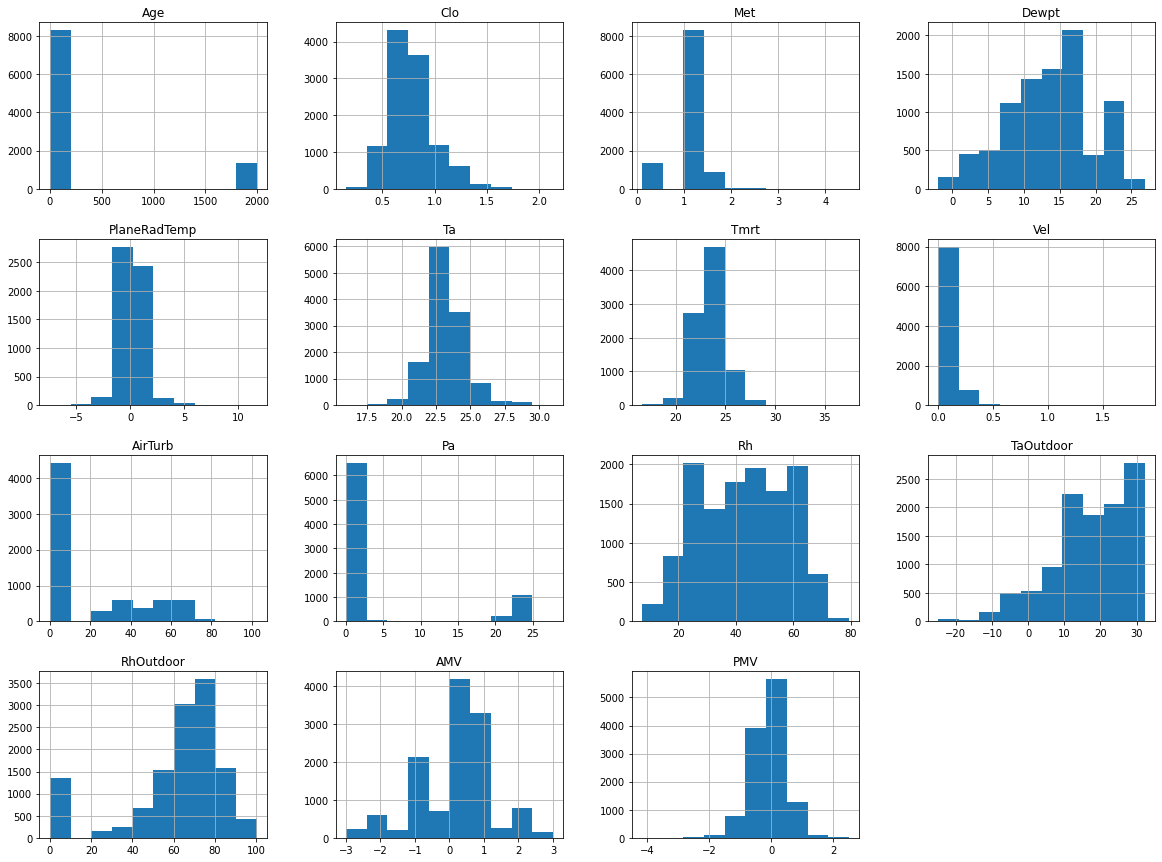


-----BoxPlot--------





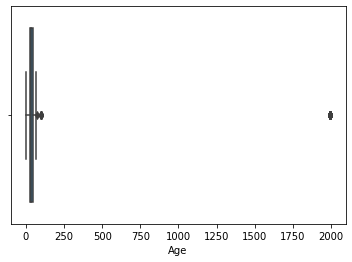

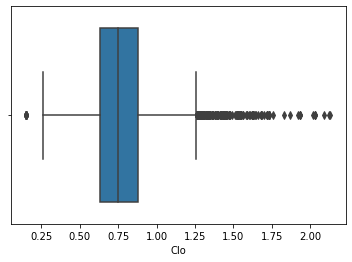

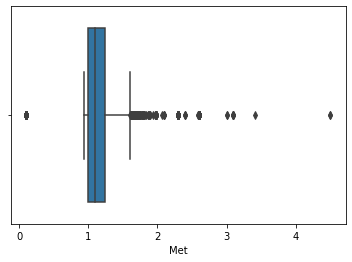

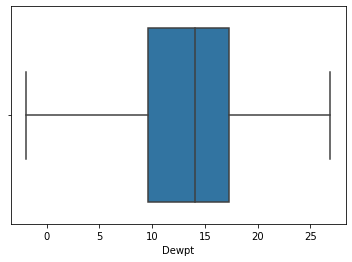

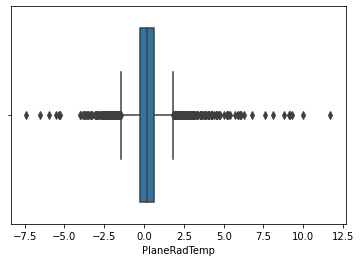

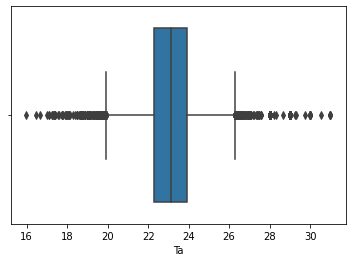

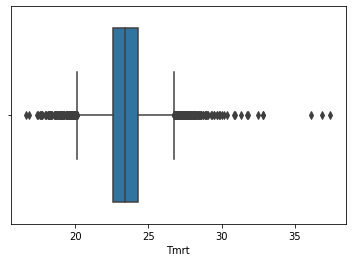

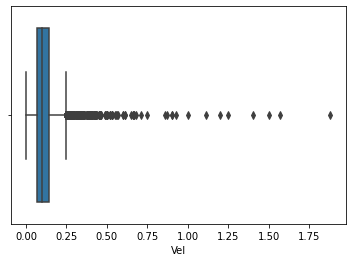

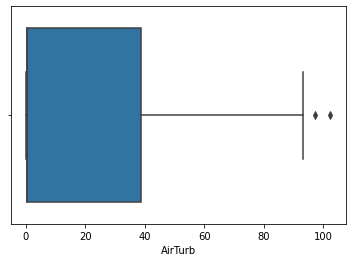

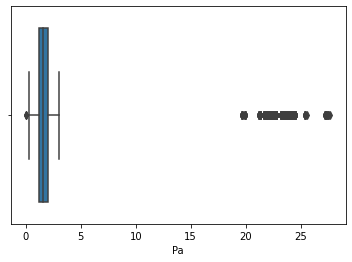

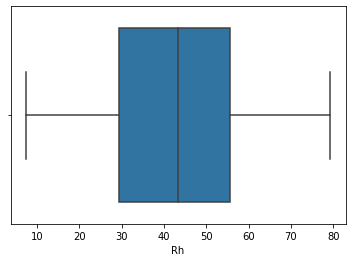

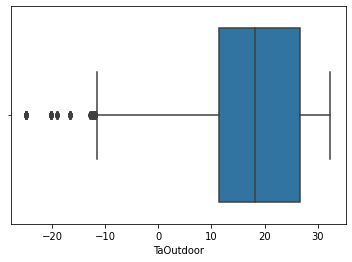

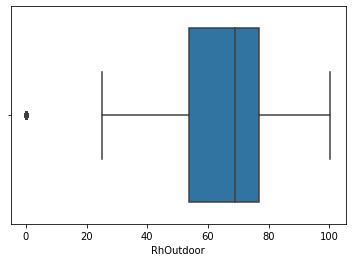

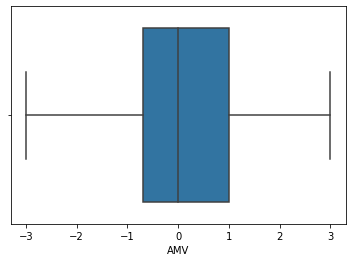

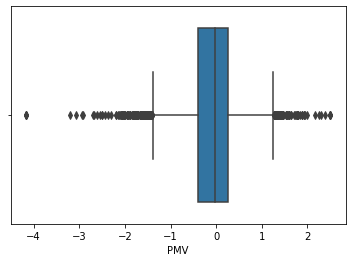

In [ ]:
print("\n-----HISTOGRAM--------\n")

Selecting_the_data.hist(bins=10,figsize = [20 , 15])
plt.show()
print("\n-----BoxPlot--------\n")
for i in range(0,15):
  print("\n")
  sns.boxplot(x=Selecting_the_data[Selecting_the_data.columns[i]])
  plt.show()


# **FILL THE MISSING VALUES**

In [ ]:

#Number Of Missing Values In Column : Age
#print("Number Of Missing Values In The Column Age : " , Selecting_the_data['Age'].isnull().sum())

#Filling Missing Values
Selecting_the_data['Age'] = Selecting_the_data['Age'].fillna(Selecting_the_data['Age']).median()
print(Selecting_the_data['Age'])

#Number Of Missing Values In Column : CLO
#print("\nNumber Of Missing Values In The Column CLO" , Selecting_the_data['Clo'].isnull().sum())

#Filling Missing Values
Selecting_the_data['Clo'] = Selecting_the_data['Clo'].fillna(Selecting_the_data['Clo'].mean())
print(Selecting_the_data['Clo'])


#Number Of Missing Values In Column : Met
#print("\nNumber Of Missing Values In The Column Met" , Selecting_the_data['Met'].isnull().sum())

#Filling Missing Values
Selecting_the_data['Met'] = Selecting_the_data['Met'].fillna(Selecting_the_data['Met'].median())
print(Selecting_the_data['Met'])


#Number Of Missing Values In Column : Dewpt
#print("\nNumber Of Missing Values In Column Dewpt" , Selecting_the_data['Dewpt'].isnull().sum())

#Filling Missing Values
Selecting_the_data['Dewpt'] = Selecting_the_data['Dewpt'].fillna(Selecting_the_data['Dewpt'].median())
print(Selecting_the_data['Dewpt'])


#Number Of Missing Values In Column : PlaneRadTemp
#print("\nNumber Of Missing Values In Column PlaneRadTemp" , Selecting_the_data['PlaneRadTemp'].isnull().sum())

#Filling Missing Values
Selecting_the_data['PlaneRadTemp'] = Selecting_the_data['PlaneRadTemp'].fillna(Selecting_the_data['PlaneRadTemp'].mean())
print(Selecting_the_data['PlaneRadTemp'])


#Number Of Missing Values In Column : Ta
#print("\nNumber Of Missing Values In Column Ta" , Selecting_the_data['Ta'].isnull().sum())

#Filling Missing Values
Selecting_the_data['Ta'] = Selecting_the_data['Ta'].fillna(Selecting_the_data['Ta'].median())
print(Selecting_the_data['Ta'])


#Number Of Missing Values In Column : Tmrt
#print("\nNumber Of Missing Values In Column Tmrt" , Selecting_the_data['Tmrt'].isnull().sum())

#Filling Missing Values
Selecting_the_data['Tmrt'] = Selecting_the_data['Tmrt'].fillna(Selecting_the_data['Tmrt'].mean())
print(Selecting_the_data['Tmrt'])


#Number Of Missing Values In Column : Vel
#print("\nNumber Of Missing Values In Column Vel" , Selecting_the_data['Vel'].isnull().sum())

#Filling Missing Values
Selecting_the_data['Vel'] = Selecting_the_data['Vel'].fillna(Selecting_the_data['Vel'].median())
print(Selecting_the_data['Vel'])


#Number Of Missing Values In Column : AirTub
#print("\nNumber Of Missing Values In Column AirTurb : " , Selecting_the_data['AirTurb'].isnull().sum())

#Filling Missing Values
Selecting_the_data['AirTurb'] = Selecting_the_data['AirTurb'].fillna(Selecting_the_data['AirTurb'].median())
print(Selecting_the_data['AirTurb'])


#Number Of Missing Values In Column : Pa
#print("\nNumber Of Missing Values In Column Pa" , Selecting_the_data['Pa'].isnull().sum())

#Filling Missing Values
Selecting_the_data['Pa'] = Selecting_the_data['Pa'].fillna(Selecting_the_data['Pa'].median())
print(Selecting_the_data['Pa'])


#Number Of Missing Values In Column : Rh
#print("\nNumber Of Missing Values In Column Rh" , Selecting_the_data['Rh'].isnull().sum())

#Filling Missing Values
Selecting_the_data['Rh'] = Selecting_the_data['Rh'].fillna(Selecting_the_data['Rh'].median())
print(Selecting_the_data['Rh'])


#Number Of Missing Values In Column : TaOutDoor
#print("\nNumber Of Missing Values In Column TaOutDoor" , Selecting_the_data['TaOutdoor'].isnull().sum())

#Filling Missing Values
Selecting_the_data['TaOutdoor'] = Selecting_the_data['TaOutdoor'].fillna(Selecting_the_data['TaOutdoor'].median())
print(Selecting_the_data['TaOutdoor'])


#Number Of Missing Values In Column : RhOutDoor
#print("\nNumber Of Missing Values In Column RhOutDoor" , Selecting_the_data['RhOutdoor'].isnull().sum())

#Filling Missing Values
Selecting_the_data['RhOutdoor'] = Selecting_the_data['RhOutdoor'].fillna(Selecting_the_data['RhOutdoor'].median())
print(Selecting_the_data['RhOutdoor'])


#Number Of Missing Values In Column : AMV
#print("\nNumber Of Missing Values In Column AMV" ,Selecting_the_data['AMV'].isnull().sum())

#Filling Missing Values
Selecting_the_data['AMV'] = Selecting_the_data['AMV'].fillna(Selecting_the_data['AMV'].median())
print(Selecting_the_data['AMV'])


#Number Of Missing Values In Column : PMV
#print("\nNumber Of Missing Values In Column PMV" , Selecting_the_data['PMV'].isnull().sum())

#Filling Missing Values
Selecting_the_data['PMV'] = Selecting_the_data['PMV'].fillna(Selecting_the_data['PMV'].median())
print(Selecting_the_data['PMV'])


87       35.0
117      35.0
120      35.0
123      35.0
124      35.0
         ... 
10293    35.0
10294    35.0
10296    35.0
10297    35.0
10299    35.0
Name: Age, Length: 3217, dtype: float64
87       1.110000
117      0.798463
120      0.798463
123      0.838023
124      0.988069
           ...   
10293    0.778503
10294    0.778503
10296    0.778503
10297    0.778503
10299    0.778503
Name: Clo, Length: 3217, dtype: float64
87       1.400000
117      1.100000
120      1.100000
123      1.100000
124      1.100000
           ...   
10293    1.387457
10294    1.417526
10296    1.344502
10297    1.052405
10299    1.030928
Name: Met, Length: 3217, dtype: float64
87       14.1
117      14.1
120      14.1
123      14.1
124      14.1
         ... 
10293    14.1
10294    14.1
10296    14.1
10297    14.1
10299    14.1
Name: Dewpt, Length: 3217, dtype: float64
87       0.217785
117      0.217785
120      0.217785
123      0.217785
124      0.217785
           ...   
10293    0.217785
10294   

# Handling the Noisy data

Age              0.000000
Clo              0.205720
Met              0.200000
Dewpt            4.990000
PlaneRadTemp     0.000000
Ta               1.600000
Tmrt             0.910721
Vel              0.040000
AirTurb          0.214667
Pa               0.241070
Rh              26.060000
TaOutdoor       13.455556
RhOutdoor       23.180063
AMV              1.700000
PMV              0.610000
dtype: float64
         Age    Clo    Met  Dewpt  PlaneRadTemp     Ta   Tmrt   Vel  AirTurb  \
0      False   True  False  False          True  False  False  True     True   
1      False  False  False  False          True  False  False  True     True   
2      False   True  False  False          True  False  False  True     True   
3      False   True  False  False          True  False  False  True     True   
4      False  False  False  False          True  False  False  True     True   
...      ...    ...    ...    ...           ...    ...    ...   ...      ...   
12560  False   True   True  False  

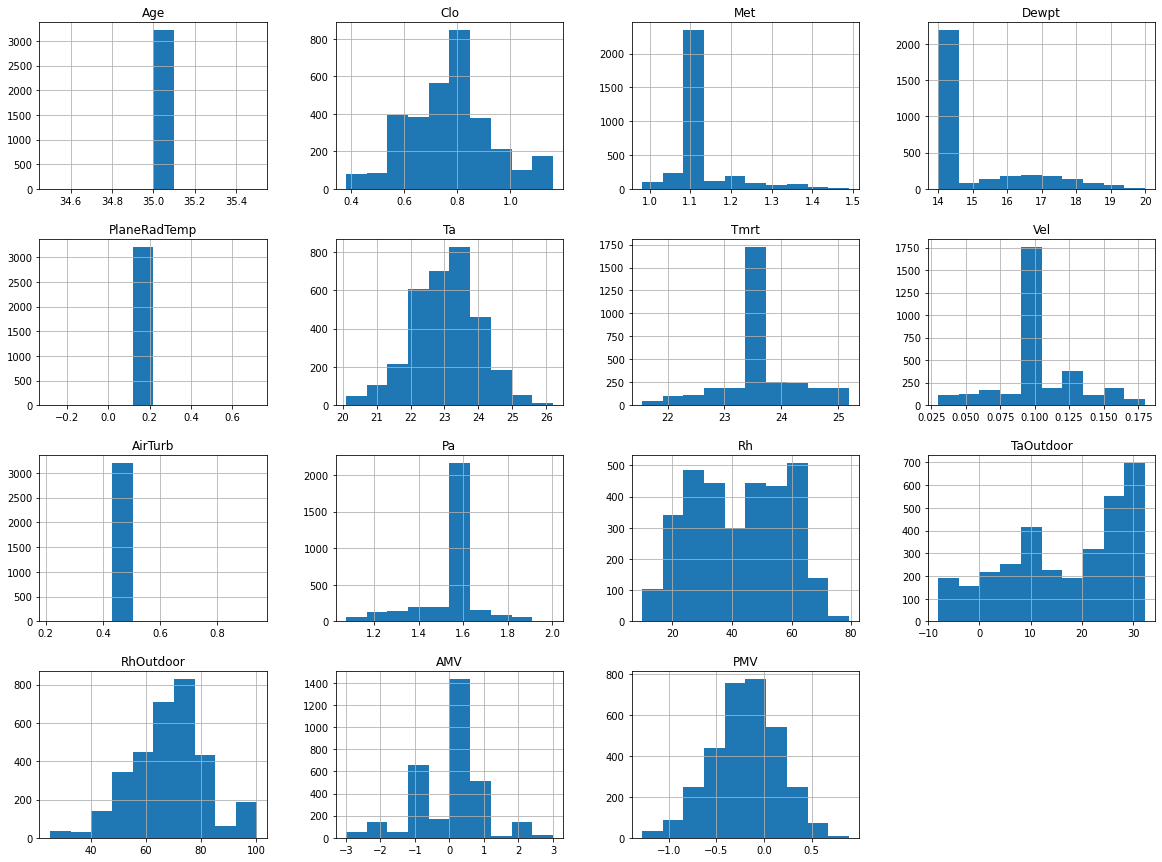

In [ ]:
#Question_4
#Finding Number Of Outliers
    
Q1 = Selecting_the_data.quantile(0.25)
Q3 = Selecting_the_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print((Selecting_the_data < ((Q1 - 1.5 * IQR)) | (Selecting_the_data > (Q3 + 1.5 * IQR))))

Selecting_the_data = Selecting_the_data[~((Selecting_the_data< (Q1 - 1.5 * IQR)) |(Selecting_the_data> (Q3 + 1.5 * IQR))).any(axis=1)]
Selecting_the_data.shape
Selecting_the_data.hist(bins=10,figsize = [20 , 15])
plt.show()



# Allpy **Filters**

In [ ]:
#Question_5
#Applying Filter
variance = Selecting_the_data.var()
columns = Selecting_the_data.columns
v = []

for i in range(0 , len(variance)):
    if variance[i] >= 0:
       v.append(columns[i])   

# **Heat Map**

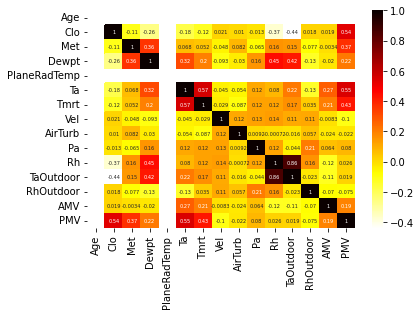

In [ ]:
dataplot = sns.heatmap(Selecting_the_data.corr() , cmap = "hot_r" , annot = True , annot_kws = {'size' : 5} )
plt.show()

# Entropy and information **gain**

In [ ]:
#Entropy
from math import e


def pandas_entropy(column, base=None):
    vc = pd.Series(column).value_counts(normalize=True, sort=False)
    base = e if base is None else base
    print(-(vc * np.log(vc)/np.log(base)).sum())
Usage: pandas_entropy(Selecting_the_data['Age'])
Usage: pandas_entropy(Selecting_the_data['Clo']) 

-0.0
4.784225029150438


Age   Clo       Met       Dewpt  PlaneRadTemp  Ta         Tmrt       Vel  AirTurb  Pa        Rh         TaOutdoor  RhOutdoor  AMV  PMV  
35.0  0.682944  1.000000  14.1   0.217785      26.000000  23.450693  0.1  0.5      1.800000  61.000000  27.555556  81.550000  0.0  -0.30    0.001554
      0.593940  0.989761  14.1   0.217785      22.600000  23.954162  0.1  0.5      1.435000  52.300000  28.050000  81.000000  0.0  -0.76    0.000933
      0.810000  1.100000  14.1   0.217785      23.000000  23.450693  0.1  0.5      1.550667  21.400000  4.400000   55.300000  0.0  -0.23    0.000933
      0.464972  1.194539  14.1   0.217785      22.400000  23.025230  0.1  0.5      1.653000  61.000000  28.050000  81.000000  0.0  -0.62    0.000933
      0.778503  1.100000  14.1   0.217785      23.136667  23.450693  0.1  0.5      1.550667  43.276815  18.200000  68.795799  0.0  -0.03    0.000933
dtype: float64


# **Part B Analysis Algorithm**

In [ ]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(Selecting_the_data)
print("Normalized Dataset In The Form Of Array :- \n")
print(normalized_data)
print("\n")
print("Normalized data in the form of Data Set : ")
normalized_data = pd.DataFrame(normalized_data , columns = Selecting_the_data.columns)
print(normalized_data)



Normalized Dataset In The Form Of Array :- 

[[0.         0.9359188  0.82348993 ... 0.74991708 0.5        0.82949309]
 [0.         0.55143157 0.23355705 ... 0.40232172 0.5        0.48387097]
 [0.         0.33355548 0.23355705 ... 0.40232172 0.5        0.35483871]
 ...
 [0.         0.65898547 0.21812081 ... 0.37277179 0.66666667 0.61290323]
 [0.         0.36454515 0.40268456 ... 0.43225296 0.58333333 0.67281106]
 [0.         0.51106444 0.09773057 ... 0.72338308 0.33333333 0.57603687]]


Normalized data in the form of Data Set : 
      Age       Clo       Met     Dewpt  PlaneRadTemp        Ta      Tmrt  \
0     0.0  0.935919  0.823490  0.016667           0.0  0.377729  0.378708   
1     0.0  0.551432  0.233557  0.016667           0.0  0.475983  0.522168   
2     0.0  0.333555  0.233557  0.016667           0.0  0.508734  0.522168   
3     0.0  0.243842  0.233557  0.016667           0.0  0.508734  0.522168   
4     0.0  0.859021  0.233557  0.016667           0.0  0.508734  0.522168   
... 

# **Forword Selection 2A**

In [ ]:

X = Selecting_the_data.drop(['PMV'] , axis = 1)
Y = Selecting_the_data['PMV']

mlr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 100)
sfs1 = sfs(mlr,k_features='best',forward=True,floating=False,scoring='neg_mean_squared_error',cv=0)
sfs1 = sfs1.fit(X_train, y_train)

feat_names = list(sfs1.k_feature_idx_)
print(feat_names)




[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13]


# BACK Word **SELECTION 2A**

In [ ]:
X = Selecting_the_data.drop(['PMV'] , axis = 1)

Y = Selecting_the_data['PMV']

mlr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 100)
sfs1 = sfs(mlr,k_features='best',forward=False,floating=False,scoring='neg_mean_squared_error',cv=0)
sfs1 = sfs1.fit(X_train, y_train)

feat_names = list(sfs1.k_feature_idx_)
print(feat_names)


TypeError: ignored

# Select the data on the bassis of PMV

In [ ]:
Selecting_the_data_PMV = pd.DataFrame(Selecting_the_data, columns=['Clo','Met','Dewpt','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','PMV'])
X = Selecting_the_data_PMV.drop(['PMV'] , axis = 1)
Y = Selecting_the_data_PMV['PMV']
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
linreg=LinearRegression()
linreg.fit(x_train,y_train)
y_pred=linreg.predict(x_test)
y_pred
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 94.92


# **Forword Selection 3A**

In [ ]:


X = Selecting_the_data.drop(['AMV'] , axis = 1)
Y = Selecting_the_data['AMV']

lab = preprocessing.LabelEncoder()
Y=lab.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 100)
LG=LogisticRegression()
sfs1 = sfs(LG,k_features='best',forward=True,floating=False,scoring='accuracy',cv=0)

sfs1 = sfs1.fit(X_train, y_train)


In [ ]:
feat_names = list(sfs1.k_feature_idx_)
print(feat_names)

In [ ]:
Selecting_the_data_AMV = pd.DataFrame(Selecting_the_data, columns=['Clo','Met','Dewpt','PlaneRadTemp','Vel','Pa','Rh','TaOutdoor','RhOutdoor','AMV',])
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
X = Selecting_the_data.drop(['AMV'] , axis = 1)
Y = Selecting_the_data['AMV']
x=np.array(X)
y=np.array(Y)
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)

ValueError: ignored

# ***BackWord Selection 3A***

In [ ]:

X = Selecting_the_data.drop(['AMV'] , axis = 1)
Y = Selecting_the_data['AMV']

lab = preprocessing.LabelEncoder()
Y=lab.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 100)
LG=LogisticRegression()
sfs1 = sfs(LG,k_features='best',forward=False,verbose=2,scoring='r2')
sfs1 = sfs1.fit(X_train, y_train)

TypeError: ignored

In [359]:
feat_names = list(sfs1.k_feature_idx_)
print(feat_names)

TypeError: ignored

# ***LOgictic Regrection AMV SPILLITING***

In [363]:
information=Selecting_the_data.astype({'AMV':'int'})

log_x_columns=information[['Clo','Met','Dewpt','PlaneRadTemp','Rh','TaOutdoor','RhOutdoor','AMV','PMV']] #fetching the first four columns and not the last one (labels for flowers)
log_y_labels=information[['AMV']] #fetching the last column having labels for flowers
X_training, X_testing, y_training, y_testing = train_test_split(log_x_columns,log_y_labels,test_size=0.20) #funtion for spliting data into training and testing

scaled=StandardScaler() 
logistic_x_training=scaled.fit_transform(X_training) 
logistic_x_testing=scaled.fit_transform(X_testing)

from sklearn.linear_model import LogisticRegression
LogisticRegression=LogisticRegression() 
LogisticRegression.fit(logistic_x_training,y_training['AMV'])
y_pred2 = LogisticRegression.predict(logistic_x_testing)
acc=accuracy_score(y_testing['AMV'], y_pred2)
print(acc*100)

99.68944099378882


# ***Selecting The data AMV***

In [370]:
Selecting_the_data_AMV = pd.DataFrame(Selecting_the_data, columns=['Clo','Met','Dewpt','PlaneRadTemp','Rh','TaOutdoor','RhOutdoor','AMV','PMV'])
print(Selecting_the_data_AMV.head())
print("\n\n")
print(Selecting_the_data_PMV.head())

          Clo  Met  Dewpt  PlaneRadTemp    Rh  TaOutdoor  RhOutdoor  AMV   PMV
87   1.110000  1.4   14.1      0.217785  31.5       6.75       81.5  0.0  0.52
117  0.798463  1.1   14.1      0.217785  62.0      31.90       72.0  0.5  0.18
120  0.798463  1.1   14.1      0.217785  61.4      31.90       72.0  1.0  0.15
123  0.838023  1.1   14.1      0.217785  60.6      31.90       72.0 -1.0  0.33
124  0.988069  1.1   14.1      0.217785  60.0      31.90       72.0  1.0  0.38



          Clo  Met  Dewpt    Ta       Tmrt   Vel  AirTurb        Pa    Rh  \
87   1.110000  1.4   14.1  22.4  22.928497  0.06      0.5  1.550667  31.5   
117  0.798463  1.1   14.1  23.8  24.892925  0.14      0.5  1.550667  62.0   
120  0.798463  1.1   14.1  23.6  24.576481  0.12      0.5  1.550667  61.4   
123  0.838023  1.1   14.1  24.3  24.733931  0.12      0.5  1.550667  60.6   
124  0.988069  1.1   14.1  23.9  24.448633  0.15      0.5  1.550667  60.0   

     TaOutdoor  RhOutdoor   PMV  
87        6.75       81.5 

# ***`Question 4`***

In [ ]:
nformation=Selecting_the_data.astype({'AMV':'int'})

log_x_columns=Selecting_the_data_PMV[['Met Rate', 'Dewpt', 'Plane Radiant Temprature', 'Air Velocity']] #fetching the first four columns and not the last one (labels for flowers)
log_y_labels=Selecting_the_data[['AMV']] #fetching the last column having labels for flowers
X_training, X_testing, y_training, y_testing = train_test_split(log_x_columns,log_y_labels,test_size=0.20) #funtion for spliting data into training and testing

scaled=StandardScaler() 
logistic_x_training=scaled.fit_transform(X_training) 
logistic_x_testing=scaled.fit_transform(X_testing)

from sklearn.linear_model import LogisticRegression
LogisticRegression=LogisticRegression() 
LogisticRegression.fit(logistic_x_training,y_training['AMV'])
y_pred2 = LogisticRegression.predict(logistic_x_testing)
acc=accuracy_score(y_testing['AMV'], y_pred2)
print(acc)